### News Popularity Prediction
- Exploratory Data Analysis
- 5 Different Hypothesis Test (implement 3)
- Fit Ridge And Lasso Regression
- Use Scaling Methods
- Add Polynomial Features
- Apply Sequential Feature Selection Methods

# EDA :

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Sequentialfeatureselection import backward_fs, forward_fs
plt.style.use('ggplot')

In [285]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [286]:
print(df.shape)

(39644, 61)


In [287]:
pd.set_option('max_colwidth', 100)

In [288]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [289]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [227]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [290]:
df  = df[df[' n_tokens_content'] != 0]
print(df.shape)

(38463, 61)


### Data visualizing :

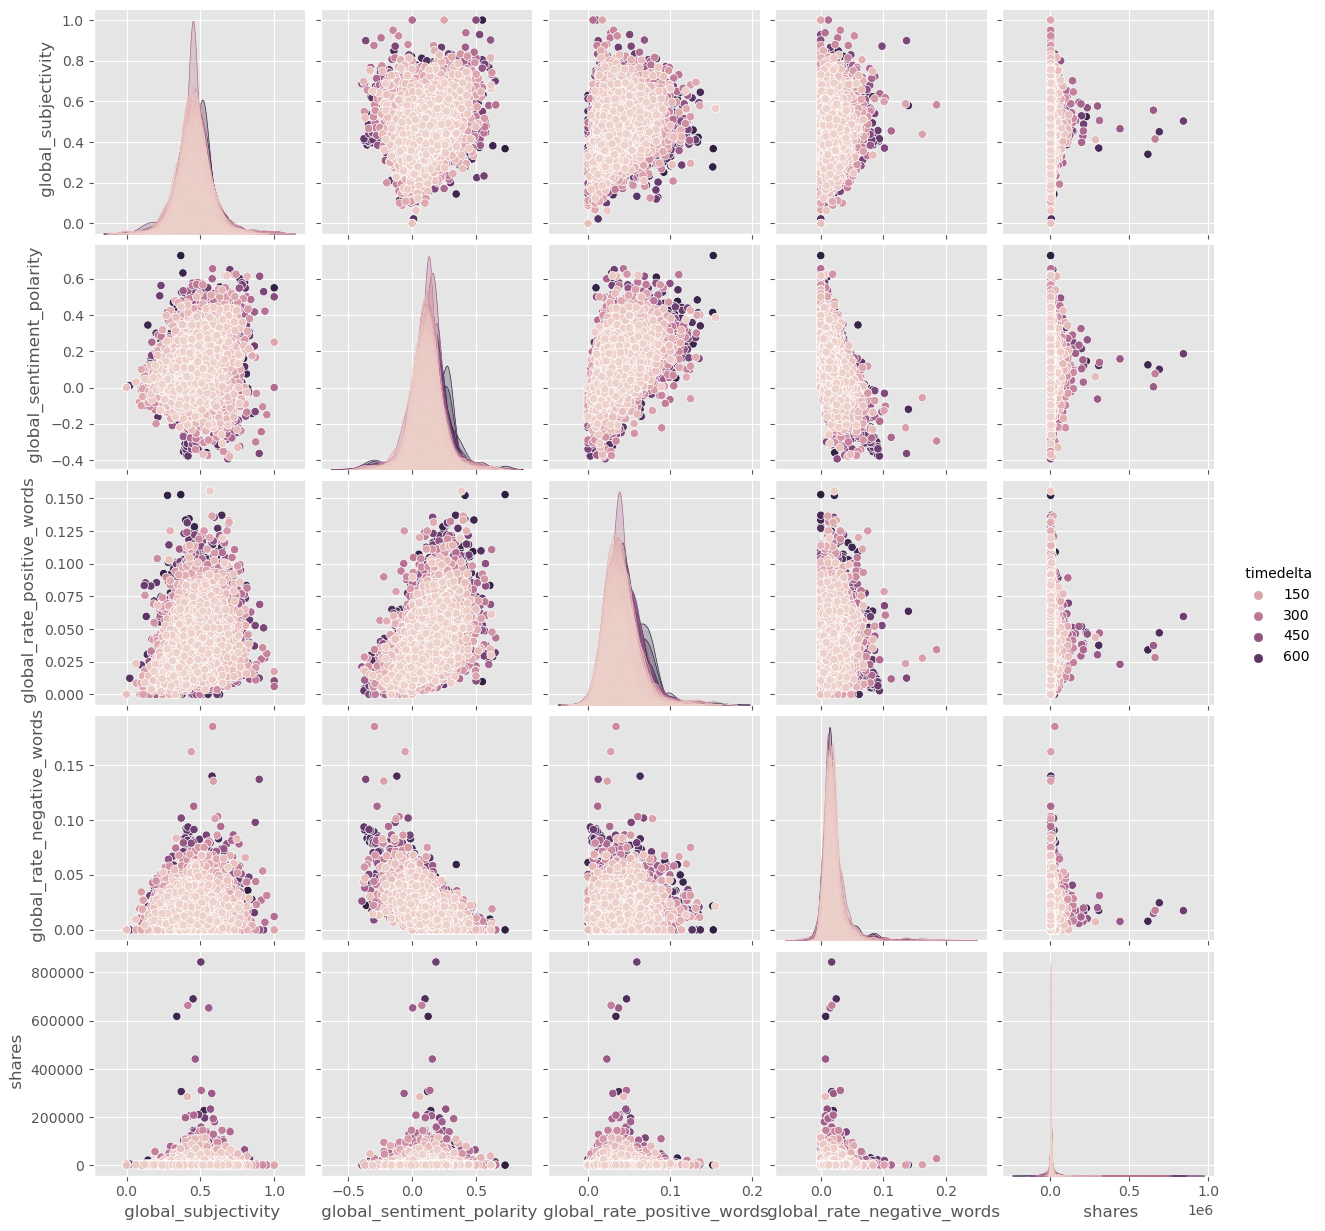

In [136]:
sns.pairplot(df,
             vars=[' global_subjectivity',' global_sentiment_polarity',
                   ' global_rate_positive_words',' global_rate_negative_words', ' shares'],
            hue=' timedelta')
plt.show()

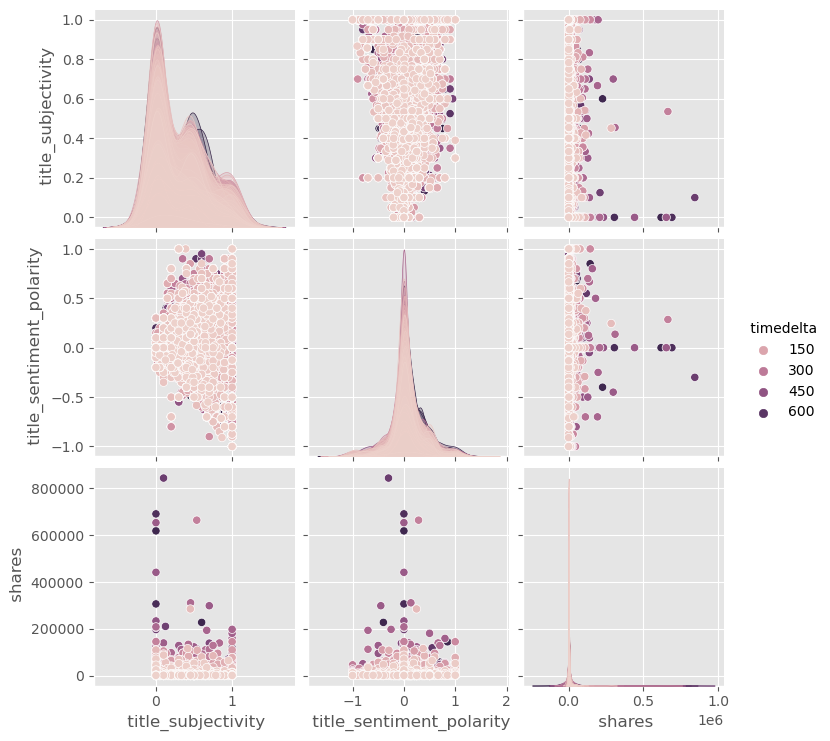

In [137]:
sns.pairplot(df,
             vars=[' title_subjectivity',' title_sentiment_polarity', ' shares'],
            hue=' timedelta')
plt.show()

### Correlation Of Features

In [291]:
df_corr = df.corr()
df_corr

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.235268,-0.098714,-0.001422,-0.005234,-0.002011,-0.028084,0.042552,-0.035083,-0.001071,-0.051967,0.049624,0.051042,-0.052420,0.046263,0.071103,0.072111,-0.178990,0.591802,0.030708,0.132906,-0.069138,-0.638786,-0.477369,-0.146373,-0.042834,-0.139355,-0.017359,-0.021874,-0.023410,-0.005094,-0.004629,0.010651,0.005056,-0.002694,-0.009843,0.003583,-0.004326,0.068898,-0.003701,-0.153332,0.009719,0.078984,0.041018,0.130806,0.162039,-0.033612,0.132158,-0.132146,0.042908,0.019110,0.017891,0.060196,0.119875,-0.033796,-0.012408,0.039737,0.013562,0.000867,0.014048
n_tokens_title,-0.235268,1.000000,0.028124,-0.004180,-0.003335,-0.003850,-0.047462,-0.008479,-0.006618,0.052470,-0.091570,-0.008001,-0.070924,0.133376,-0.021239,-0.090150,-0.044113,0.053304,-0.108418,-0.006146,-0.030798,0.010146,0.118716,0.108522,-0.008171,0.003647,-0.005095,-0.003046,0.002107,0.002747,0.004845,0.007885,0.008438,-0.016110,-0.001746,-0.013044,0.007126,-0.003943,-0.067391,0.068999,0.042935,0.029195,-0.061245,-0.037360,-0.065216,-0.052459,0.028863,-0.050759,0.051959,-0.029604,-0.015386,0.002318,-0.035629,-0.046040,0.002815,0.077825,0.000011,-0.149854,0.040948,0.006209
n_tokens_content,-0.098714,0.028124,1.000000,-0.010506,0.010961,-0.007303,0.402893,0.283291,0.353097,0.102033,-0.074420,0.080738,0.032965,0.061633,-0.020131,0.026724,0.010313,0.058684,-0.066126,0.000752,-0.006698,-0.015004,0.071651,-0.065398,-0.007166,-0.021091,-0.053654,-0.038735,0.017062,-0.023748,-0.003279,-0.004268,-0.016839,-0.007787,-0.017138,0.037311,0.037537,0.054856,0.010910,-0.012371,0.086805,-0.108993,0.023218,-0.010224,-0.022914,0.059010,0.074611,-0.037799,0.038174,0.018475,-0.324818,0.371072,-0.063389,-0.415986,0.277153,0.011276,0.026272,0.003652,0.020022,0.006714
n_unique_tokens,-0.001422,-0.004180,-0.010506,1.000000,0.999590,0.999899,-0.009077,0.002565,0.018767,-0.001127,0.001979,-0.003000,-0.002400,0.011083,-0.002089,-0.001938,-0.004411,-0.005543,0.000258,-0.000469,-0.001234,0.001794,-0.000169,0.005717,0.006801,-0.000768,0.001799,0.000067,-0.001428,0.000729,-0.002267,0.010690,-0.002170,-0.002299,-0.001499,-0.002422,-0.001856,-0.003124,-0.004331,-0.001142,-0.007440,0.001361,-0.006824,-0.024600,-0.005493,-0.011840,-0.008530,-0.022910,-0.011071,-0.020711,0.002876,-0.028014,0.011956,0.019499,-0.001965,-0.003891,-0.002123,-0.009890,-0.003500,0.001368
n_non_stop_words,-0.005234,-0.003335,0.010961,0.999590,1.000000,0.999538,-0.000098,0.008703,0.028544,-0.001547,0.000149,-0.000572,-0.001218,0.010948,-0.002243,-0.001289,-0.002473,-0.002648,-0.002010,-0.000492,-0.001390,0.000890,0.002191,0.002910,0.005966,-0.001767,-0.000750,-0.000847,-0.001305,0.000068,-0.002293,0.010652,-0.002448,-0.002416,-0.002091,-0.001306,-0.001389,-0.001977,-0.003613,-0.003278,-0.003924,-0.003782,-0.004177,-0.026364,-0.006526,-0.012832,-0.008246,-0.023868,-0.010086,-0.021761,-0.007127,-0.018715,0.011256,0.009807,0.005952,-0.004422,-0.001370,-0.009258,-0.003501,0.001

In [219]:
# sns.heatmap(df_corr, annot=True)

### Dropping Columns

In [292]:
df = df.drop(columns=['url', ' timedelta', ' min_negative_polarity', ' max_negative_polarity', ' min_positive_polarity', ' max_positive_polarity'])

In [293]:
y = df[' shares'].values
X = df.drop(columns = [' shares']).values

### Modeling

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print('X_train shape:', X_train.shape, '- y_train shape: ', y_train.shape)

X_train shape: (30770, 54) - y_train shape:  (30770,)


In [301]:
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [307]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred_rr = rr.predict(X_test)
print(mean_squared_error(y_test, y_pred_rr))
print(r2_score(y_test, y_pred_rr))

54824290.78382122
0.029581627382593845


C:\Users\Rina\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.44617e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [308]:
lar = Lasso(alpha=0.01)
lar.fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_lar))) 
print(r2_score(y_test, y_pred_lar))

7404.536042646501
0.029530946850417683


C:\Users\Rina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+12, tolerance: 4.728e+08
  model = cd_fast.enet_coordinate_descent(


### Testing Ridge and Lasso with feature scaled data :

#### Min-Max Scaler :

In [316]:
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df_scale.head(5)
y_scale = df_scale[' shares'].values
X_scale = df_scale.drop(columns = [' shares']).values
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.20, random_state=40)

#ridge regression
rr.fit(X_train_scale, y_train_scale) 
y_pred_rr_scale = rr.predict(X_test_scale)
print('ridge mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('ridge r2_score:', r2_score(y_test_scale, y_pred_rr_scale))

#lasso regression
lar.fit(X_train_scale, y_train_scale) 
y_pred_lar_scale = lar.predict(X_test_scale)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('lasso r2_score:', r2_score(y_test_scale, y_pred_lar_scale))

ridge mse: 7.71041247867603e-05
ridge r2_score: 0.029430207346424875
lasso mse: 7.71041247867603e-05
lasso r2_score: -0.0011376682534236515


#### Standard Normalization:

In [317]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df_scale.head(5)
y_scale = df_scale[' shares'].values
X_scale = df_scale.drop(columns = [' shares']).values
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.20, random_state=40)

#ridge
rr.fit(X_train_scale, y_train_scale) 
y_pred_rr_scale = rr.predict(X_test_scale)
print('ridge mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('ridge r2_score:', r2_score(y_test_scale, y_pred_rr_scale))

#lasso
lar.fit(X_train_scale, y_train_scale) 
y_pred_lar_scale = lar.predict(X_test_scale)
print('lasso mse:', mean_squared_error(y_test_scale, y_pred_rr_scale))
print('lasso r2_score:', r2_score(y_test_scale, y_pred_lar_scale))

ridge mse: 0.4084315842965861
ridge r2_score: 0.02958226898054017
lasso mse: 0.4084315842965861
lasso r2_score: 0.031063902653821862


In [268]:
# X = backward_fs(X, y, "l2")

In [214]:
# X = forward_fs(X, y, "l1")